In [1]:
from astropy.table import Table
import astropy.units as u
from scipy.stats import kstest, ks_2samp, gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})

In [2]:
eisner_data = Table.read('/home/jotter/nrao/tables/eisner_tbl.txt', format='ascii')
eisner_ind = np.where(eisner_data['R_disk'] != '<5')[0]
eisner_ulim_ind = np.where(eisner_data['R_disk'] == '<5')[0]
eisner_R = [float(x.split()[0])*2 for x in eisner_data['R_disk'][eisner_ind]]
eisner_ulim = np.repeat(10, len(eisner_ulim_ind)) #10 bc 5 is lower limit for hwhm
eisflux = [float(es.split()[0]) for es in eisner_data['F_lambda 850mum']]
eisflux_log = np.log10(eisflux)

data = Table.read('/home/jotter/nrao/summer_research_2018/tables/r0.5_catalog_bgfit_may21_ulim_mask.fits')
ONCdata = Table.read('/home/jotter/nrao/summer_research_2018/tables/IR_matches_MLLA_may21_full_edit.fits')
OMC1data = Table.read('/home/jotter/nrao/summer_research_2018/tables/OMC1_r0.5_may21.fits')

In [3]:
##size histogram
ONC_R_B3 = ONCdata['fwhm_maj_deconv_B3'] * 400
ONC_R_B3 = ONC_R_B3[np.isnan(ONC_R_B3)==False] 
ONC_ulim_B3 = ONCdata['upper_lim_B3']
ONC_ulim_B3 = ONC_ulim_B3[np.isnan(ONC_ulim_B3)==False]
OMC1_R = OMC1data['fwhm_maj_deconv_B3'] * 400
OMC1_R = OMC1_R[np.isnan(OMC1_R)==False]
OMC1_ulim = OMC1data['upper_lim_B3']
OMC1_ulim = OMC1_ulim[np.isnan(OMC1_ulim)==False]

ONC_R = np.concatenate((ONC_R_B3, eisner_R))
ONC_ulim = np.concatenate((ONC_ulim_B3, eisner_ulim))

size_grid = np.linspace(0,100,100)
width=10
ONC_R_ulim = np.concatenate((ONC_R, ONC_ulim))
ONC_size_kde = gaussian_kde(ONC_R_ulim)
ONC_size_pdf = ONC_size_kde.evaluate(size_grid)
ONC_norm_size_pdf = ONC_size_pdf*width*len(ONC_R_ulim)

OMC1_R_ulim = np.concatenate((OMC1_R, OMC1_ulim))
OMC1_size_kde = gaussian_kde(OMC1_R_ulim)
OMC1_size_pdf = OMC1_size_kde.evaluate(size_grid)
OMC1_norm_size_pdf = OMC1_size_pdf*width*len(OMC1_R_ulim)

print(ONC_size_kde.factor, OMC1_size_kde.factor)

0.3555473666802242 0.45730505192732634


Text(0, 0.5, 'Number')

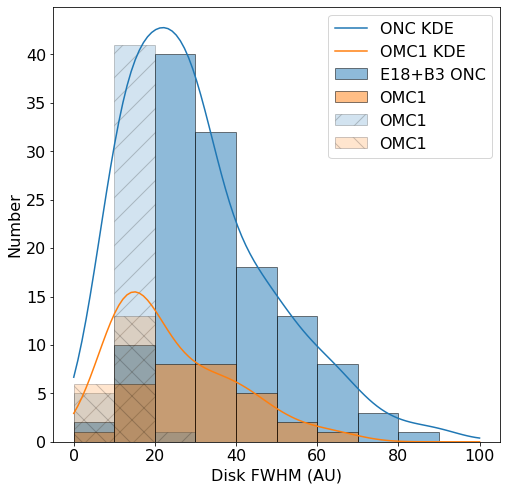

In [4]:
bins = np.arange(0,100,10)
ONC_hist, b = np.histogram(ONC_R, bins=bins)
ONC_B3_hist, b = np.histogram(ONC_R_B3, bins=bins)
OMC1_hist, b = np.histogram(OMC1_R, bins=bins)

ONC_hist_ulim, b = np.histogram(ONC_ulim, bins=bins)
OMC1_hist_ulim, b = np.histogram(OMC1_ulim, bins=bins)

fig = plt.figure(figsize=(8,8))
plt.bar(b[:-1], ONC_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='E18+B3 ONC', ec='k')
#plt.bar(b[:-1], ONC_B3_hist, width=b[1]-b[0], alpha=0.5, align='edge')
plt.bar(b[:-1], OMC1_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='OMC1', ec='k')

plt.bar(b[:-1], ONC_hist_ulim, width=b[1]-b[0], alpha=0.2, align='edge', label='OMC1', color='tab:blue', ec='k', hatch='/')
plt.bar(b[:-1], OMC1_hist_ulim, width=b[1]-b[0], alpha=0.2, align='edge', label='OMC1', color='tab:orange', ec='k', hatch='\\')

plt.plot(size_grid, ONC_norm_size_pdf, label='ONC KDE')
plt.plot(size_grid, OMC1_norm_size_pdf, label='OMC1 KDE')

plt.legend()
plt.xlabel('Disk FWHM (AU)')
plt.ylabel('Number')

#plt.savefig('/home/jotter/nrao/plots/ONC_OMC1_size_hist.pdf', bbox_inches='tight')

In [5]:
Dval, pval = ks_2samp(ONC_R, OMC1_R)
print(f'{pval} p value of ks test')
Dval, pval = ks_2samp(ONC_R_B3, OMC1_R)
print(f'{pval} p value of ks test')

0.3744231919010922 p value of ks test
0.9285544233451122 p value of ks test


In [6]:
print(len(OMC1_R[OMC1_R < 10]) + len(OMC1_ulim[OMC1_ulim < 10]))
print(len(OMC1_R) + len(OMC1_ulim))

7
50


In [7]:
print(len(ONC_R[ONC_R < 10]) + len(ONC_ulim[ONC_ulim < 10]))
print(len(ONC_ulim) + len(ONC_ulim))

7
94


In [8]:
##flux histogram
ONC_flux_B7 = ONCdata['ap_flux_B7'] * 1000
ONC_flux_B7 = ONC_flux_B7[np.isnan(ONC_flux_B7)==False] 
OMC1_flux = OMC1data['ap_flux_B7'] * 1000
OMC1_flux = OMC1_flux[np.isnan(OMC1_flux)==False]

ONC_flux = np.concatenate((ONC_flux_B7, eisflux))
ONC_flux_log = np.log10(ONC_flux)
OMC1_flux_log = np.log10(OMC1_flux)

flux_grid = np.linspace(-1,3,100)
width=0.4
ONC_flux_kde = gaussian_kde(ONC_flux_log)
ONC_flux_pdf = ONC_flux_kde.evaluate(flux_grid)
ONC_norm_flux_pdf = ONC_flux_pdf*width*len(ONC_flux_log)

OMC1_flux_kde = gaussian_kde(OMC1_flux_log)
OMC1_flux_pdf = OMC1_flux_kde.evaluate(flux_grid)
OMC1_norm_flux_pdf = OMC1_flux_pdf*width*len(OMC1_flux_log)

print(ONC_flux_kde.factor, OMC1_flux_kde.factor)

0.3891852707755854 0.5253055608807534


Text(0, 0.5, 'Number')

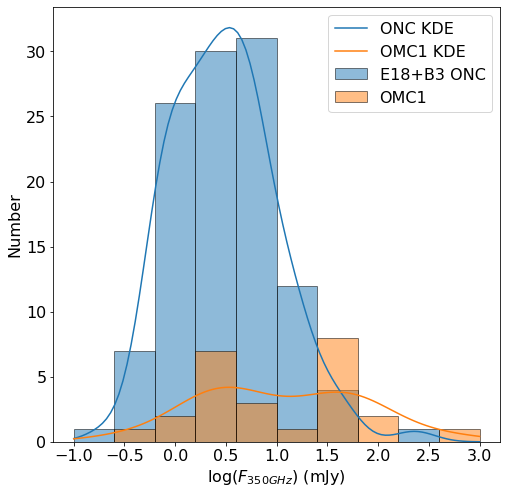

In [9]:
bins = np.arange(-1,3.4,0.4)
ONC_flux_hist, b = np.histogram(ONC_flux_log, bins=bins)
ONC_flux_B7_hist, b = np.histogram(np.log10(ONC_flux_B7), bins=bins)
OMC1_flux_hist, b = np.histogram(OMC1_flux_log, bins=bins)

fig = plt.figure(figsize=(8,8))
plt.bar(b[:-1], ONC_flux_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='E18+B3 ONC', ec='k')
#plt.bar(b[:-1], ONC_flux_B7_hist, width=b[1]-b[0], alpha=0.5, align='edge')
plt.bar(b[:-1], OMC1_flux_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='OMC1', ec='k')

plt.plot(flux_grid, ONC_norm_flux_pdf, label='ONC KDE')
plt.plot(flux_grid, OMC1_norm_flux_pdf, label='OMC1 KDE')

plt.legend()
plt.xlabel('$\log (F_{350GHz})$ (mJy)')
plt.ylabel('Number')

#plt.savefig('/home/jotter/nrao/plots/ONC_OMC1_flux_hist.pdf', bbox_inches='tight')

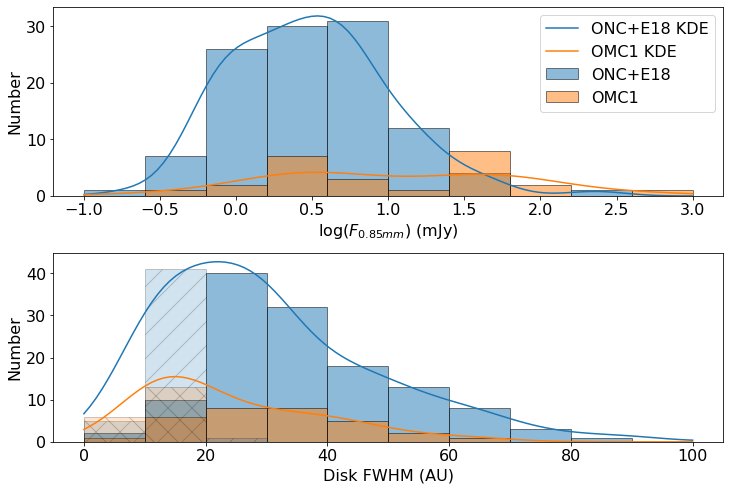

In [10]:
fig, [ax0,ax1] = plt.subplots(2,1,figsize=(12,8))

bins = np.arange(-1,3.4,0.4)
ONC_flux_hist, b = np.histogram(ONC_flux_log, bins=bins)
OMC1_flux_hist, b = np.histogram(OMC1_flux_log, bins=bins)


ax0.plot(flux_grid, ONC_norm_flux_pdf, label='ONC+E18 KDE')
ax0.plot(flux_grid, OMC1_norm_flux_pdf, label='OMC1 KDE')

ax0.bar(b[:-1], ONC_flux_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='ONC+E18', ec='k')
ax0.bar(b[:-1], OMC1_flux_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='OMC1', ec='k')


ax0.legend()
ax0.set_xlabel('$\log (F_{0.85mm})$ (mJy)')
ax0.set_ylabel('Number')

bins = np.arange(0,100,10)
ONC_hist, b = np.histogram(ONC_R, bins=bins)
ONC_B3_hist, b = np.histogram(ONC_R_B3, bins=bins)
OMC1_hist, b = np.histogram(OMC1_R, bins=bins)

ONC_hist_ulim, b = np.histogram(ONC_ulim, bins=bins)
OMC1_hist_ulim, b = np.histogram(OMC1_ulim, bins=bins)

ax1.bar(b[:-1], ONC_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='E18+B3 ONC', ec='k')
ax1.bar(b[:-1], OMC1_hist, width=b[1]-b[0], alpha=0.5, align='edge', label='OMC1', ec='k')

ax1.bar(b[:-1], ONC_hist_ulim, width=b[1]-b[0], alpha=0.2, align='edge', color='tab:blue', ec='k', hatch='/')
ax1.bar(b[:-1], OMC1_hist_ulim, width=b[1]-b[0], alpha=0.2, align='edge', color='tab:orange', ec='k', hatch='\\')

ax1.plot(size_grid, ONC_norm_size_pdf, label='ONC+E18 KDE')
ax1.plot(size_grid, OMC1_norm_size_pdf, label='OMC1 KDE')

#ax1.legend()
ax1.set_xlabel('Disk FWHM (AU)')
ax1.set_ylabel('Number')

plt.subplots_adjust(hspace=0.3)
plt.savefig('/home/jotter/nrao/plots/ONC_OMC1_sizeflux_hist.pdf', bbox_inches='tight')

In [11]:
print(ONC_flux_kde.factor)
print(OMC1_flux_kde.factor)
print(ONC_size_kde.factor)
print(OMC1_size_kde.factor)

0.3891852707755854
0.5253055608807534
0.3555473666802242
0.45730505192732634


In [22]:
Dval, pval = ks_2samp(np.log10(ONC_flux_B7), OMC1_flux_log)
print(f'{pval} p value of ks test')
Dval, pval = ks_2samp(ONC_flux_log, OMC1_flux_log)
print(f'{pval} p value of ks test')

0.5088981663279903 p value of ks test
0.0020894037521430597 p value of ks test


In [23]:
len(np.where(np.isnan(data['fwhm_maj_deconv_B7']) == False)[0])

17

In [24]:
ONCdata

ID,B3_Seq,fwhm_maj_B3,fwhm_maj_err_B3,fwhm_min_B3,fwhm_min_err_B3,pa_B3,pa_err_B3,gauss_amp_B3,gauss_amp_err_B3,RA_B3,RA_err_B3,DEC_B3,DEC_err_B3,ap_flux_B3,ap_flux_err_B3,fwhm_maj_deconv_B3,fwhm_maj_deconv_err_B3,fwhm_min_deconv_B3,fwhm_min_deconv_err_B3,pa_deconv_B3,pa_deconv_err_B3,SNR_B3,RMS_B3,ar_deconv_B3,D_ID,fwhm_maj_B6,fwhm_maj_err_B6,fwhm_min_B6,fwhm_min_err_B6,pa_B6,pa_err_B6,gauss_amp_B6,gauss_amp_err_B6,RA_B6,RA_err_B6,DEC_B6,DEC_err_B6,ap_flux_B6,ap_flux_err_B6,fwhm_maj_deconv_B6,fwhm_maj_deconv_err_B6,fwhm_min_deconv_B6,fwhm_min_deconv_err_B6,pa_deconv_B6,pa_deconv_err_B6,SNR_B6,RMS_B6,ar_deconv_B6,fwhm_maj_B7,fwhm_maj_err_B7,fwhm_min_B7,fwhm_min_err_B7,pa_B7,pa_err_B7,gauss_amp_B7,gauss_amp_err_B7,RA_B7,RA_err_B7,DEC_B7,DEC_err_B7,ap_flux_B7,ap_flux_err_B7,fwhm_maj_deconv_B7,fwhm_maj_deconv_err_B7,fwhm_min_deconv_B7,fwhm_min_deconv_err_B7,pa_deconv_B7,pa_deconv_err_B7,SNR_B7,RMS_B7,ar_deconv_B7,upper_lim_B3,upper_lim_B6,upper_lim_B7,B6_flux_ulim,B7_flux_ulim,recno,MLLA,m_MLLA,RAJ2000,DEJ2000,Jmag1,e_Jmag1,Hmag1,e_Hmag1,Kmag1,e_Kmag1,Lmag1,e_Lmag1,Jmag2,e_Jmag2,Hmag2,e_Hmag2,Ksmag2,e_Ksmag2,phFlag,__H97b_,m__H97b_,__HC2000_,Name,_2MASS,Separation
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,AU,AU,AU,,,,,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,arcsec
int64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,bytes1,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,bytes1,int16,bytes18,bytes5,float64
0,0,0.10305585997928254,0.005978321021454948,0.08478250887162492,0.004918503770637874,56.95452545532544,0.20888564676048593,0.0002547371545014736,1.4777247800786749e-05,83.81515090326748,6.704696865522927e-07,-5.3823407933457466,6.200124333207998e-07,0.00030326626340923296,7.005527787363965e-06,0.05180421201112408,0.005978321021454948,0.026503408218873602,0.004918503770637874,-1.2702585309348218,0.20888564676048593,19.399299361304976,1.4112799362919759e-05,1.9546245367127264,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,529,503,,83.81517,-5.38233,9.35,0.01,8.55,0.01,8.10,0.06,6.86,0.02,nan,nan,nan,nan,nan,nan,0,479,,389,"036(1),113(2)",2MASS,0.06255617103966238
1,1,0.11584944756560857,0.014047580955655387,0.06481658989387087,0.007859839676357889,58.66559214544469,0.13968770465164923,0.0001731617899034192,2.0999984799853715e-05,83.80704254391247,1.4952667586795851e-06,-5.382287866738019,1.170309120265059e-06,0.00016871907851167075,1.4191411921993958e-05,nan,nan,nan,nan,nan,nan,7.024454045060415,1.4553046639775857e-05,nan,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18.110688028549117,nan,nan,nan,nan,532,506,,83.80704,-5.38228,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,15.91,0.42,0,0,,0,,2MASS,0.03645609424424162
2,2,0.07598532943911104,0.008706835425854306,0.0637818541430692,0.00730782438216444,241.73067686299476,0.46020146578238064,0.00022885897305836324,2.62237110154526e-05,83.8169899462259,9.924663864372184e-07,-5.381757079653479,9.016615753801123e-07,0.0001547257992428559,1.3263358536929322e-05,nan,nan,nan,nan,nan,nan